In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **COVID-19 DEATHS IN US**

In [183]:
# covid-19 Deaths in US
link = "https://drive.google.com/open?id=1AqoEZF5UgfInqPZZQsaZi-CO9iYy0lGn"
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('time_series_covid19_deaths_US.csv')  
data = pd.read_csv('time_series_covid19_deaths_US.csv')

# Show first 5 rows of dataset
data.sample(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
1048,84021101,US,USA,840,21101.0,Henderson,Kentucky,US,37.793446,-87.573920,"Henderson, Kentucky, US",45210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3124,84056001,US,USA,840,56001.0,Albany,Wyoming,US,41.654987,-105.723541,"Albany, Wyoming, US",38880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
335,84012021,US,USA,840,12021.0,Collier,Florida,US,26.110920,-81.346871,"Collier, Florida, US",384902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,3
2176,84040081,US,USA,840,40081.0,Lincoln,Oklahoma,US,35.702709,-96.881246,"Lincoln, Oklahoma, US",34877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1649,84030093,US,USA,840,30093.0,Silver Bow,Montana,US,45.900189,-112.662009,"Silver Bow, Montana, US",34915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 92 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             3253 non-null   int64  
 1   iso2            3253 non-null   object 
 2   iso3            3253 non-null   object 
 3   code3           3253 non-null   int64  
 4   FIPS            3251 non-null   float64
 5   Admin2          3246 non-null   object 
 6   Province_State  3253 non-null   object 
 7   Country_Region  3253 non-null   object 
 8   Lat             3253 non-null   float64
 9   Long_           3253 non-null   float64
 10  Combined_Key    3253 non-null   object 
 11  Population      3253 non-null   int64  
 12  1/22/20         3253 non-null   int64  
 13  1/23/20         3253 non-null   int64  
 14  1/24/20         3253 non-null   int64  
 15  1/25/20         3253 non-null   int64  
 16  1/26/20         3253 non-null   int64  
 17  1/27/20         3253 non-null   i

In [185]:
print(data["iso2"].unique())
print(data["iso3"].unique())
print(data["code3"].unique())


['AS' 'GU' 'MP' 'PR' 'VI' 'US']
['ASM' 'GUM' 'MNP' 'PRI' 'VIR' 'USA']
[ 16 316 580 630 850 840]


In [186]:
data[data['Province_State']=='Florida']['Admin2'].unique()

array(['Alachua', 'Baker', 'Bay', 'Bradford', 'Brevard', 'Broward',
       'Calhoun', 'Charlotte', 'Citrus', 'Clay', 'Collier', 'Columbia',
       'DeSoto', 'Dixie', 'Duval', 'Escambia', 'Flagler', 'Franklin',
       'Gadsden', 'Gilchrist', 'Glades', 'Gulf', 'Hamilton', 'Hardee',
       'Hendry', 'Hernando', 'Highlands', 'Hillsborough', 'Holmes',
       'Indian River', 'Jackson', 'Jefferson', 'Lafayette', 'Lake', 'Lee',
       'Leon', 'Levy', 'Liberty', 'Madison', 'Manatee', 'Marion',
       'Martin', 'Miami-Dade', 'Monroe', 'Nassau', 'Okaloosa',
       'Okeechobee', 'Orange', 'Osceola', 'Palm Beach', 'Pasco',
       'Pinellas', 'Polk', 'Putnam', 'St. Johns', 'St. Lucie',
       'Santa Rosa', 'Sarasota', 'Seminole', 'Sumter', 'Suwannee',
       'Taylor', 'Union', 'Volusia', 'Wakulla', 'Walton', 'Washington',
       'Out of FL', 'Unassigned'], dtype=object)

Database describe: 
+ 92 colums
+ 3253 rows
+ iso2 - COUNTRY CODES ALPHA-2: 'AS' as American Samoa; 'GU' as Guam; 'MP' as Northern Mariana Islands; 'PR' as Puerto Rico	; 'VI' as Virgin Islands (U.S.); 'US' as United States of America.
+ iso3 - COUNTRY CODES ALPHA-3: 'ASM' as American Samoa; 'GUM' as Guam; 'MNP' as Northern Mariana Islands; 'PRI' as Puerto Rico; 'VIR' as Virgin Islands (U.S.); 'USA' as United States of America.	
+ FIPS: FIPS codes by county.
+ Province_State.
+ Admin2: counties of Province State.
+ Country_Region.
+ Lat Long: location of Admin2.
+ Combined_Key
+ Population
+ The number of deaths in each county from 22/01/2020 to 10/04/2020. 

In [187]:
data_sort = data.sort_values( by = ['4/10/20'])
data_sort.tail(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
2974,84053033,US,USA,840,53033.0,King,Washington,US,47.491379,-121.834613,"King, Washington, US",2252782,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,6,9,10,12,15,17,17,21,22,27,32,34,35,43,46,56,60,67,74,75,87,87,101,109,109,136,141,144,150,150,175,186,200,208,222,230,244,258,277
1298,84026125,US,USA,840,26125.0,Oakland,Michigan,US,42.660901,-83.385954,"Oakland, Michigan, US",1257584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,4,10,15,26,31,34,48,70,99,119,136,142,163,185,205,234,246,282
1785,84034013,US,USA,840,34013.0,Essex,New Jersey,US,40.786813,-74.246580,"Essex, New Jersey, US",798975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,7,13,13,4,69,99,118,155,172,186,232,276,321,352
1892,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",967506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,10,10,10,10,25,64,67,67,67,211,211,283,359,389
1780,84034003,US,USA,840,34003.0,Bergen,New Jersey,US,40.960109,-74.071643,"Bergen, New Jersey, US",932202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,6,6,6,6,6,6,6,13,23,23,4,75,120,132,179,189,200,263,314,345,390
615,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",5150233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,9,9,14,18,20,28,40,44,61,95,107,141,167,186,209,209,310,310,399
1884,84036103,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",1476601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,3,7,9,9,13,17,20,22,30,30,40,40,44,53,69,84,124,175,199,263,323,362,414
1317,84026163,US,USA,840,26163.0,Wayne,Michigan,US,42.280984,-83.281255,"Wayne, Michigan, US",1749343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,5,8,13,21,26,37,46,56,83,120,146,194,223,252,293,346,402,446,504,609
1862,84036059,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",1356924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,4,4,4,4,9,17,17,19,27,39,39,48,76,76,95,95,162,162,500,500,633,723
1863,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",5803210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,7,7,11,26,29,45,63,99,131,199,281,366,672,776,914,1096,1374,1762,2243,2630,3048,3485,4009,4571,5150,5820


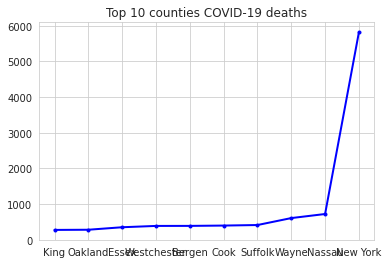

<Figure size 432x288 with 0 Axes>

In [188]:
top10_county = data_sort.tail(10)
#Visualize top 10 counties COVID19 deaths
plt.title('Top 10 counties COVID-19 deaths')
plt.plot(top10_county['Admin2'], top10_county['4/10/20'], "bo-", linewidth = 2, markersize = 3 );
plt.show()
plt.savefig("top10counties.png")


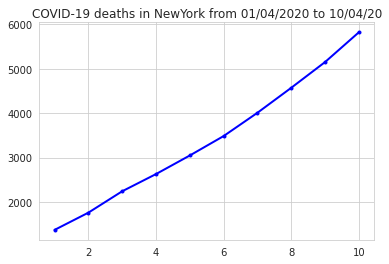

<Figure size 432x288 with 0 Axes>

In [189]:
#Visualize COVID19 deaths in Newyork from 01/04/20 - 10/04/20

Deaths_NY = top10_county[top10_county['Admin2'] == 'New York']
time = pd.Series(pd.date_range('2020/04', freq='D', periods=10))
#time = pd.Series(pd.date_range(start='2020/04/01',end='2020/04/10'))
plt.title('COVID-19 deaths in NewYork from 01/04/2020 to 10/04/20')
plt.plot( time.dt.day, Deaths_NY.iloc[0,82:92], "bo-", linewidth = 2, markersize = 3 );

plt.show()
plt.savefig("COVIDDeathsInNY.pdf")


# **Time Series COVID-19 confirmed US**

In [190]:
# covid-19 Confirmed in US
link = "https://drive.google.com/open?id=1dYgcxdDvjN0SNkLIccdTG0mSaAWuvDtX"
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('time_series_covid19_confirmed_US.csv')  
ConfirmedUS_data = pd.read_csv('time_series_covid19_confirmed_US.csv')

# Show first 5 rows of dataset
ConfirmedUS_data.sample(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
655,84017111,US,USA,840,17111.0,McHenry,Illinois,US,42.324512,-88.452482,"McHenry, Illinois, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,4,6,6,11,12,12,14,19,19,45,47,52,52,63,69,81,102,122,133,144,144,180,180,206
1075,84021155,US,USA,840,21155.0,Marion,Kentucky,US,37.552181,-85.268985,"Marion, Kentucky, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,3,4,4
1162,84022089,US,USA,840,22089.0,St. Charles,Louisiana,US,29.907097,-90.355560,"St. Charles, Louisiana, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,3,4,7,7,7,15,15,17,22,23,30,31,36,71,82,180,210,252,260,285,310,328,362,376
1125,84022015,US,USA,840,22015.0,Bossier,Louisiana,US,32.679323,-93.604602,"Bossier, Louisiana, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,5,5,5,12,12,25,32,37,45,56,57,63,75,87,95,126,133,139,146,159,171,175
2715,84048375,US,USA,840,48375.0,Potter,Texas,US,35.401338,-101.893964,"Potter, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,3,3,3,3,3,5,5,8,16,16,21,24,40,40,41,47,58,59


In [191]:
ConfirmedUS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             3253 non-null   int64  
 1   iso2            3253 non-null   object 
 2   iso3            3253 non-null   object 
 3   code3           3253 non-null   int64  
 4   FIPS            3251 non-null   float64
 5   Admin2          3246 non-null   object 
 6   Province_State  3253 non-null   object 
 7   Country_Region  3253 non-null   object 
 8   Lat             3253 non-null   float64
 9   Long_           3253 non-null   float64
 10  Combined_Key    3253 non-null   object 
 11  1/22/20         3253 non-null   int64  
 12  1/23/20         3253 non-null   int64  
 13  1/24/20         3253 non-null   int64  
 14  1/25/20         3253 non-null   int64  
 15  1/26/20         3253 non-null   int64  
 16  1/27/20         3253 non-null   int64  
 17  1/28/20         3253 non-null   i

In [192]:
 ConfirmedUS_data = ConfirmedUS_data.sort_values( by = ['4/10/20'])
ConfirmedUS_data.tail(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
1785,84034013,US,USA,840,34013.0,Essex,New Jersey,US,40.786813,-74.246580,"Essex, New Jersey, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,3,7,7,20,32,45,63,73,107,172,273,342,381,609,826,1086,1227,1564,1900,2262,2617,3067,3584,4082,4493,5078,5598,6069,6580
1876,84036087,US,USA,840,36087.0,Rockland,New York,US,41.150279,-74.025605,"Rockland, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,4,4,6,7,9,10,12,16,22,31,53,101,262,455,592,671,968,1197,1457,1896,2209,2511,2863,3321,3751,4289,4872,5326,5703,5990,6413,6665,7122
209,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,7,11,13,14,14,14,20,27,32,40,53,53,94,144,190,231,292,292,407,536,662,812,1229,1465,1465,1829,2474,3019,3518,4045,4566,4605,5955,6377,6936,7559,7955,8443
1780,84034003,US,USA,840,34003.0,Bergen,New Jersey,US,40.960109,-74.071643,"Bergen, New Jersey, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,4,4,4,7,11,13,15,25,25,61,84,114,195,249,363,457,609,701,819,1206,1505,1838,2169,2482,2909,3494,4099,4866,5760,6187,6862,7533,7874,8343,8928
1317,84026163,US,USA,840,26163.0,Wayne,Michigan,US,42.280984,-83.281255,"Wayne, Michigan, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,2,6,8,14,14,23,44,67,102,477,638,876,1122,1389,1810,2316,2704,3195,3735,4470,5069,6096,6762,7518,8270,9045,9626,10093,10539
615,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,4,4,4,5,5,6,7,7,11,22,27,40,50,50,62,107,178,278,278,548,805,922,1194,1418,1418,2239,2613,3445,3727,4496,5152,5575,6111,7439,8034,8728,8728,10520,10520,12472
1892,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,10,18,19,57,83,98,98,121,148,158,172,178,220,380,538,798,1091,1387,1873,2894,3891,4691,5944,7187,7875,8519,9326,9967,10683,11567,12351,13081,13723,14294,14294,15887,17004,18077
1884,84036103,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,6,20,28,33,41,74,97,116,239,459,662,1034,1458,1880,2260,2735,3385,4138,5023,5791,6713,7605,8746,10154,11370,13129,14185,15561,17008,18803,20320
1862,84036059,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,4,5,17,19,28,41,51,68,79,109,140,278,372,754,1234,1900,2442,2869,3285,3914,4657,5537,6445,7344,8544,9554,10587,12024,13346,14398,15616,16610,18548,20140,21512
1863,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,11,11,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384


In [0]:
C_date = ['C_4/1/20','C_4/2/20','C_4/3/20','C_4/4/20','C_4/5/20','C_4/6/20','C_4/7/20','C_4/8/20','C_4/9/20','C_4/10/20']
D_date = ['D_4/1/20','D_4/2/20','D_4/3/20','D_4/4/20','D_4/5/20','D_4/6/20','D_4/7/20','D_4/8/20','D_4/9/20','D_4/10/20']

In [0]:
#Create a dataframe: COVID10 Confirmed and COVID19 Deaths in US
COV19 = pd.DataFrame(columns=['UID', 'FIPS', 'Admin2', 'Province_State'] + C_date + D_date)

In [0]:
Deaths_US_sort = data.sort_values(by='UID')
Confir_US_sort = ConfirmedUS_data.sort_values(by='UID')

In [0]:
COV19['UID'] = Deaths_US_sort['UID']
COV19['FIPS'] = Deaths_US_sort['FIPS']
COV19['Admin2'] = Deaths_US_sort['Admin2']
COV19['Province_State'] = Deaths_US_sort['Province_State']

for i in range (20):
  if i < 10:
    COV19.iloc[:,4+i] = Confir_US_sort.iloc[:,81+i]
  else:
    COV19.iloc[:,4+i] = Deaths_US_sort.iloc[:,72+i]


In [197]:
COV19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 3252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             3253 non-null   int64  
 1   FIPS            3251 non-null   float64
 2   Admin2          3246 non-null   object 
 3   Province_State  3253 non-null   object 
 4   C_4/1/20        3253 non-null   int64  
 5   C_4/2/20        3253 non-null   int64  
 6   C_4/3/20        3253 non-null   int64  
 7   C_4/4/20        3253 non-null   int64  
 8   C_4/5/20        3253 non-null   int64  
 9   C_4/6/20        3253 non-null   int64  
 10  C_4/7/20        3253 non-null   int64  
 11  C_4/8/20        3253 non-null   int64  
 12  C_4/9/20        3253 non-null   int64  
 13  C_4/10/20       3253 non-null   int64  
 14  D_4/1/20        3253 non-null   int64  
 15  D_4/2/20        3253 non-null   int64  
 16  D_4/3/20        3253 non-null   int64  
 17  D_4/4/20        3253 non-null   i

In [198]:
#Total of COVID19 deaths in US from 01/04/2020 to 10/04/2020
#Total of COVID19 confirmed in US from 01/04/2020 to 10/04/2020

Total_Deaths = [] 
Total_Confirm = []
for i in range(10):
  Total_Deaths.append(sum(COV19.iloc[0:3253,14+i])) 
  Total_Confirm.append(sum(COV19.iloc[0:3253,4+i]))

print(Total_Deaths)
print(Total_Confirm)

[4992, 6291, 7746, 9132, 10411, 10783, 12721, 14694, 16477, 18581]
[213362, 243762, 275582, 308848, 337065, 366660, 396221, 429047, 461432, 496530]


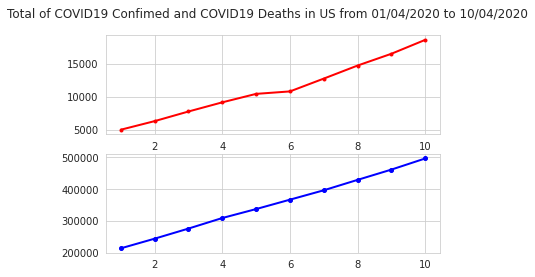

In [199]:
COV_USplot,axs = plt.subplots(2)
COV_USplot.suptitle("Total of COVID19 Confimed and COVID19 Deaths in US from 01/04/2020 to 10/04/2020")
axs[0].plot(time1,Total_Deaths, "ro-", linewidth = 2, markersize = 3);
axs[1].plot(time1, Total_Confirm, "bo-", linewidth = 2, markersize = 4);
COV_USplot.show()
COV_USplot.savefig("COVID19inUS.pdf")

# **Predicting the COV19 situation in the US**

**Predicting COV19 deaths in US**

In [200]:
#Total of COVID19 deaths in US from 22/01/2020 to 10/04/2020
#Total of COVID19 confirmed in US from 22/01/2020 to 10/04/2020

Total_Deaths1 = [] 
Total_Confirm1 = []
for i in range(80):
  Total_Deaths1.append(sum(data.iloc[0:3253,12+i])) 
  Total_Confirm1.append(sum(ConfirmedUS_data.iloc[0:3253,11+i]))

print(Total_Deaths1)
print(Total_Confirm1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 7, 11, 12, 14, 17, 21, 22, 28, 32, 40, 48, 52, 60, 84, 107, 143, 209, 258, 318, 427, 552, 706, 942, 1209, 1581, 2181, 2565, 3102, 4037, 4992, 6291, 7746, 9132, 10411, 10783, 12721, 14694, 16477, 18581]
[1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 16, 16, 24, 30, 53, 73, 104, 172, 217, 336, 450, 514, 708, 1105, 1557, 2147, 2857, 2918, 4307, 6096, 8873, 14094, 19403, 25725, 33634, 43663, 53736, 65778, 83836, 101657, 121465, 140909, 161831, 188172, 213362, 243762, 275582, 308848, 337065, 366660, 396221, 429047, 461432, 496530]


In [0]:
Total_Deaths2 = []
len1=0
for i in range(80):
  if Total_Deaths1[i] >= 500:
    len1 += 1
    Total_Deaths2.append(Total_Deaths1[i])
#deadths in US from 11/04/2020 to 14/04/2020
Total_Deaths2.append(20411)
Total_Deaths2.append(21939)
Total_Deaths2.append(23474)
Total_Deaths2.append(25881)
len1+=4
X = np.array([np.array(range(1,len1+1)).T]).T
#time4 = np.array([time3]).T
Y = np.array([Total_Deaths2]).T

In [202]:
#Predict COV19 deaths in US
from sklearn.linear_model import LinearRegression
Predict_C0V19_deaths = LinearRegression(fit_intercept=True)
Predict_C0V19_deaths.fit(X, Y)
Predict_C0V19_deaths.score (X,Y)

0.9424319097442874

In [0]:
def ChangeTime(a):
  if pd.to_datetime(a) >= pd.to_datetime('2020/03/22'):
    return pd.Timedelta(pd.to_datetime(a) - pd.to_datetime('2020/03/21'))
#Đổi time thành 1 số int dể thực hiện dự đoán

In [204]:
a = '2020/04/15'
b = ChangeTime(a)
c = int(b.days)
p = Predict_C0V19_deaths.predict(np.array([[c]]))
print( 'Predicting COV19 deaths in the US in', a,'is', p)


Predicting COV19 deaths in the US in 2020/04/15 is [[24827.15217391]]


**Predicting COV19 confirmed in US**

In [0]:
Total_Confirmed2 = []
len2=0
for i in range(80):
  if Total_Confirm1[i] >= 120000:
    len2 += 1
    Total_Confirmed2.append(Total_Deaths1[i])
#COV19 confirmed in US from 11/04/2020 to 14/04/2020
Total_Confirmed2.append(526533)
Total_Confirmed2.append(553954)
Total_Confirmed2.append(580595)
Total_Confirmed2.append(607540)
len2+=4
XC = np.array([np.array(range(1,len2+1)).T]).T
YC = np.array([Total_Confirmed2]).T

In [206]:
Predict_C0V19_confirmed = LinearRegression(fit_intercept=True)
Predict_C0V19_confirmed.fit(XC, YC)
Predict_C0V19_confirmed.score (XC,YC)

0.5463164216902539

In [207]:
a = '2020/04/15'
b = ChangeTime(a)
c = int(b.days)
p = Predict_C0V19_confirmed.predict(np.array([[c]]))
print( 'Predicting COV19 confirmed in the US in', a,'is', p)

Predicting COV19 confirmed in the US in 2020/04/15 is [[646528.0247678]]
